In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
dfobservations = pd.read_csv('observations.csv')
dfspecies = pd.read_csv('species_info.csv')

In [2]:
dfspecies.fillna('No Intervention', inplace=True)
dfspecies

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervention
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervention
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervention
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervention


In [3]:
dfobservations[dfobservations.scientific_name.duplicated()]

,scientific_name,park_name,observations
44,Elaeagnus umbellata,Great Smoky Mountains National Park,85
166,Viola blanda var. blanda,Yellowstone National Park,245
211,Penstemon procerus,Yellowstone National Park,215
221,Chasmanthium sessiliflorum,Great Smoky Mountains National Park,70
238,Doellingeria infirma,Great Smoky Mountains National Park,68
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [4]:
df = pd.merge(dfobservations, dfspecies, on='scientific_name')
df

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention
...,...,...,...,...,...,...
25627,Gulo gulo,Yosemite National Park,157,Mammal,Wolverine,No Intervention
25628,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Vascular Plant,"Green Panic-Grass, Panic Grass",No Intervention
25629,Dichanthelium depauperatum,Bryce National Park,80,Vascular Plant,"Green Panic-Grass, Panic Grass",No Intervention
25630,Dichanthelium depauperatum,Yellowstone National Park,255,Vascular Plant,"Green Panic-Grass, Panic Grass",No Intervention


In [5]:
species_freqs = df.category.value_counts(normalize=True)
species_freqs = species_freqs.multiply(100)
print('Species Proportions (%) for All Data')
print(species_freqs)

Species Proportions (%) for All Data
Vascular Plant       76.310861
Bird                  9.222846
Nonvascular Plant     5.196629
Mammal                4.681648
Fish                  2.044320
Amphibian             1.279650
Reptile               1.264045
Name: category, dtype: float64


In [28]:
print(df['conservation_status'].value_counts())

No Intervention       24752
Species of Concern      732
Endangered               80
Threatened               44
In Recovery              24
Name: conservation_status, dtype: int64


In [30]:
protection_counts = df.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name')
print(protection_counts)

  conservation_status  scientific_name
1         In Recovery                4
4          Threatened               10
0          Endangered               15
3  Species of Concern              151
2     No Intervention             5363


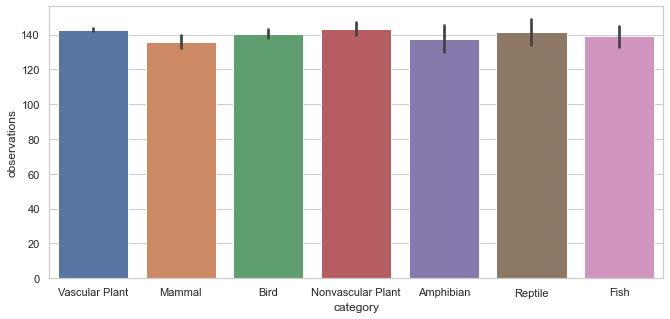

In [36]:
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(11, 5))
sns.barplot(x="category", y="observations", data=df)
plt.show()

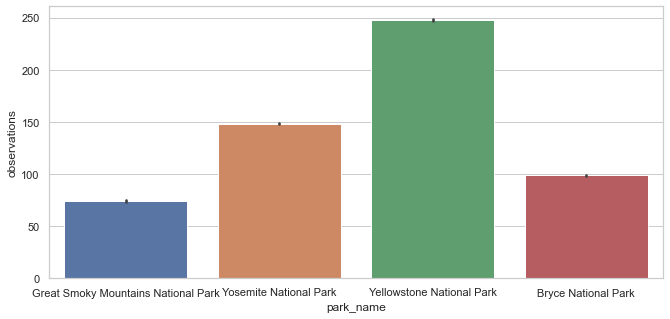

In [7]:
plt.subplots(figsize=(11, 5))
sns.barplot(x="park_name", y="observations", data=df)
plt.show()

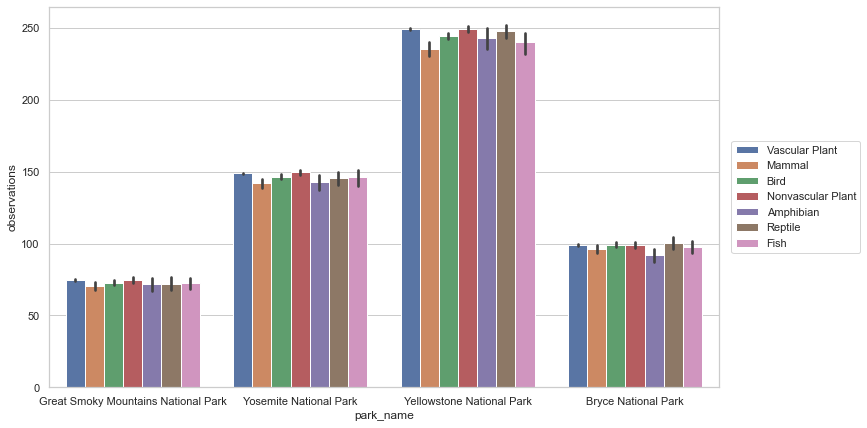

In [8]:
f, ax = plt.subplots( figsize=(12,7) )
g = sns.barplot( data = df , x = 'park_name', y = 'observations' , hue = 'category' )
g.legend(loc = 'center right', bbox_to_anchor = (1.22, 0.5))
plt.show()

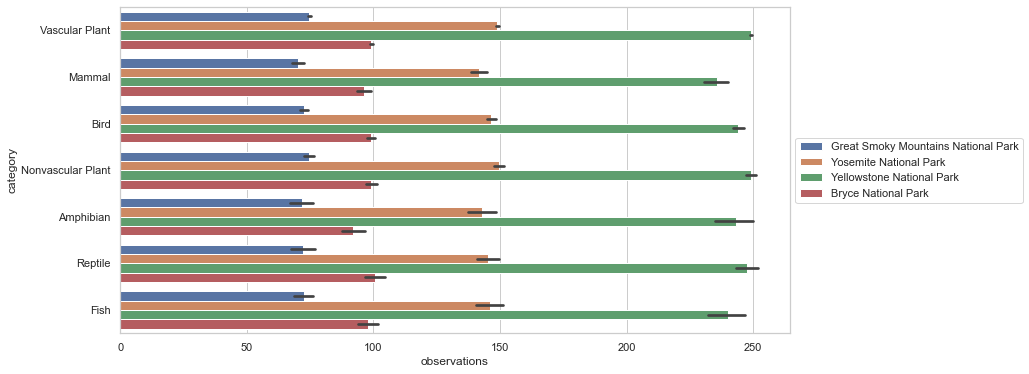

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.observations, y=df.category, hue=df.park_name).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);
plt.show()

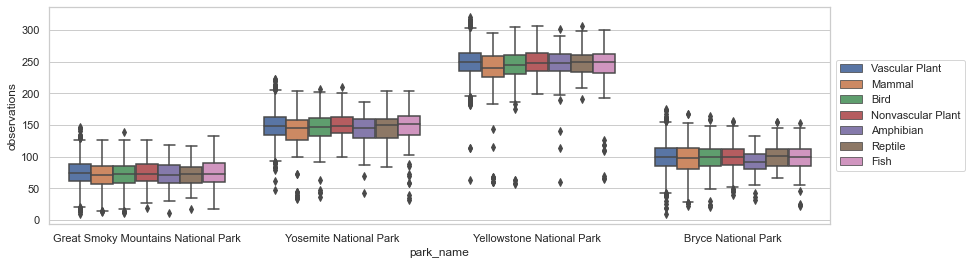

In [10]:
plt.figure(figsize=(14,4))
sns.boxplot(x=df.park_name, y=df.observations, hue=df.category).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

In [11]:
df.groupby("category").size()

category
Amphibian              328
Bird                  2364
Fish                   524
Mammal                1200
Nonvascular Plant     1332
Reptile                324
Vascular Plant       19560
dtype: int64

In [12]:
print(f"unique conservation statuses:{df.conservation_status.unique()}")

unique conservation statuses:['No Intervention' 'Species of Concern' 'Threatened' 'Endangered'
 'In Recovery']


In [13]:
print(f"unique parks:{df.park_name.unique()}")

unique parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Yellowstone National Park' 'Bryce National Park']


In [14]:
data_by_conservation_and_category = df.groupby(['category','conservation_status']).scientific_name.count().reset_index()
data_by_conservation_and_category.rename(columns = {'scientific_name' : 'species_count'}, inplace = True)
data_by_conservation_and_category

,category,conservation_status,species_count
0,Amphibian,Endangered,4
1,Amphibian,No Intervention,300
2,Amphibian,Species of Concern,16
3,Amphibian,Threatened,8
4,Bird,Endangered,16
5,Bird,In Recovery,12
6,Bird,No Intervention,2016
7,Bird,Species of Concern,320
8,Fish,Endangered,12
9,Fish,No Intervention,476


In [15]:
categories = data_by_conservation_and_category.category.unique().tolist()
species_count = [  ]
for jj in categories:
    x = data_by_conservation_and_category[ data_by_conservation_and_category.category == jj ].species_count.sum()
    y = 100.0*data_by_conservation_and_category[ data_by_conservation_and_category.category == jj ].species_count/x 
    species_count.append(y)
    print( jj, y.sum() )

species_count = np.concatenate(species_count)
data_by_conservation_and_category['percentage'] = species_count

Amphibian 100.0
Bird 100.0
Fish 99.99999999999999
Mammal 100.00000000000001
Nonvascular Plant 100.0
Reptile 100.0
Vascular Plant 100.0


<ipython-input-16-aab81dbab1d8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(( '0','0','0.1%', '1%', '10%', '100%' ))


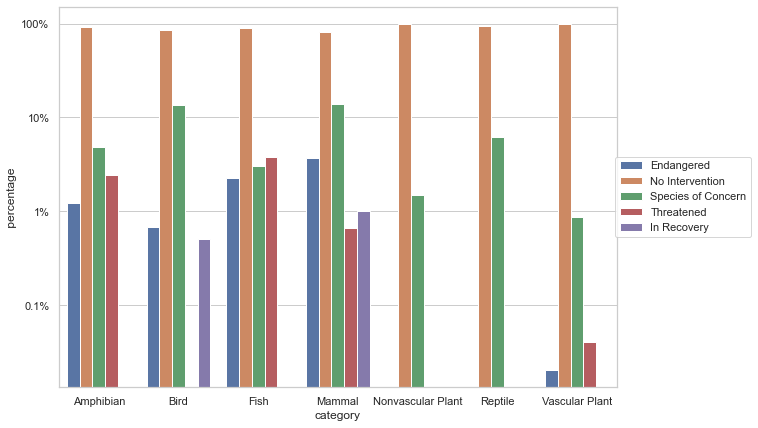

In [16]:
f, ax = plt.subplots(figsize=(10,7))
g = sns.barplot(data = data_by_conservation_and_category, x = 'category', y = 'percentage', hue = 'conservation_status')
g.legend(loc = 'center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
ax.set_ylabel(' percentage ')
g.set_yscale("log")
ax.set_yticklabels(( '0','0','0.1%', '1%', '10%', '100%' ))
plt.show()

In [21]:
df['is_protected'] = df.conservation_status != 'No Intervention'
category_counts = df.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()

category_counts

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115
5,Fish,True,11
6,Mammal,False,146
7,Mammal,True,30
8,Nonvascular Plant,False,328
9,Nonvascular Plant,True,5


In [41]:
category_pivot = category_counts.pivot(index = 'category', columns = 'is_protected', values = 'scientific_name').reset_index()
category_pivot.columns=['category','not_protected','protected']
category_pivot

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [42]:
from scipy.stats import chi2_contingency
contingency = [[30, 146], [75, 413]]
chi2, pval, dof, expected = chi2_contingency(contingency)
print(pval)

0.6875948096661336


In [44]:
df['is_sheep'] = df['common_names'].apply(lambda x: True if 'Sheep' in x else False)

In [53]:
sheep_observations = df[(df.is_sheep) & (df.category == 'Mammal')]
sheep_species

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_sheep
19224,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
19225,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
19226,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
19227,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
19956,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
19957,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
19958,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
19959,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
25224,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
25225,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True


In [54]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()
print(obs_by_park)

                             park_name  observations
0                  Bryce National Park           250
1  Great Smoky Mountains National Park           149
2            Yellowstone National Park           507
3               Yosemite National Park           282


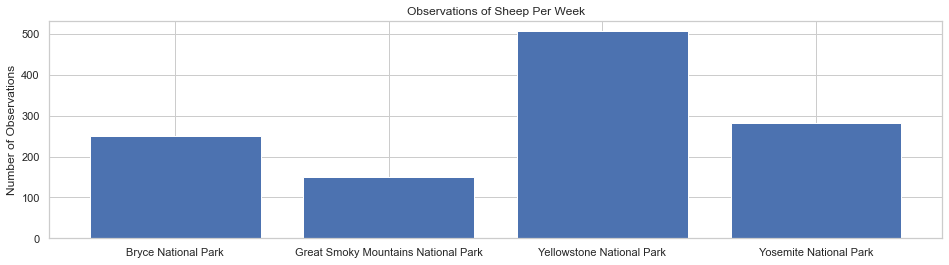

In [55]:
plt.figure(figsize = (16,4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park)), obs_by_park.observations)
ax.set_xticks(range(len(obs_by_park)))
ax.set_xticklabels(obs_by_park.park_name)
plt.ylabel("Number of Observations")
plt.title("Observations of Sheep Per Week")
plt.savefig("observations.png")
plt.show()